In [20]:
import pandas as pd
import numpy as np
import pylab
import seaborn as sns

In [4]:
from constants import *

In [5]:
dist_column = 'pareto front scaling distance'
removal_column = 'pareto front distance'

In [13]:
models_df = pd.read_csv('%s/models.csv' % STATISTICS_DIR, skipinitialspace=True)
#models_df[['pareto front distance', 'pareto front scaling distance']] = models_df[['pareto front distance', 'pareto front scaling distance']].apply(np.log)
models_df

,arbor name,model,pareto front distance,pareto front scaling distance
0,087_1_C_day4,arbor,2.023704,1.072667
1,087_1_C_day4,random,87.523951,3.043072
2,087_1_C_day4,random,111.668084,3.634563
3,087_1_C_day4,random,83.278267,2.974552
4,087_1_C_day4,random,77.388023,2.803433
...,...,...,...,...
88654,009_2_C_day4,random,57.770116,2.942164
88655,009_2_C_day4,random,32.007389,2.040848
88656,009_2_C_day4,random,43.630989,2.397885
88657,009_2_C_day4,random,39.951146,2.323136


In [14]:
models_df.drop(removal_column, axis=1, inplace=True)
models_df

,arbor name,model,pareto front scaling distance
0,087_1_C_day4,arbor,1.072667
1,087_1_C_day4,random,3.043072
2,087_1_C_day4,random,3.634563
3,087_1_C_day4,random,2.974552
4,087_1_C_day4,random,2.803433
...,...,...,...
88654,009_2_C_day4,random,2.942164
88655,009_2_C_day4,random,2.040848
88656,009_2_C_day4,random,2.397885
88657,009_2_C_day4,random,2.323136


In [15]:
models_df[dist_column].max()

90.611908

In [17]:
agg_df = models_df.groupby(['arbor name', 'model']).agg(pylab.mean).reset_index()
arbor_rank_df = agg_df[agg_df['model'] == 'arbor'].sort_values(by=dist_column)
arbor_rank_df['arbor index'] = range(1, len(arbor_rank_df.index) + 1)
arbor_rank_df = arbor_rank_df.drop(['model', dist_column], axis=1)

In [33]:
scatter_df = pd.merge(models_df, arbor_rank_df)
#scatter_df[dist_column] = np.log(scatter_df[dist_column])
scatter_df.sort_values(by='model', ascending=False, inplace=True)
scatter_df

,arbor name,model,pareto front scaling distance,arbor index
88658,009_2_C_day4,random,2.715645,2267
56394,076_2_S_day4,random,1.605123,1797
56392,076_2_S_day4,random,2.488620,1797
56391,076_2_S_day4,random,1.486593,1797
56390,076_2_S_day4,random,2.184517,1797
...,...,...,...,...
56320,250_3_S_day2,arbor,1.095645,3540
56299,211_3_S_day4,arbor,1.014424,314
56278,173_4_S_day4,arbor,1.064391,2815
56257,229_4_C_day3,arbor,1.050421,2200


<AxesSubplot:xlabel='arbor index', ylabel='pareto front scaling distance'>

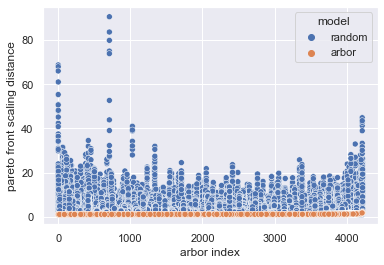

In [35]:
sns.set()
sns.scatterplot(x='arbor index', y=dist_column, hue='model', data=scatter_df)

In [22]:
null_models_df = models_df[models_df['model'] != 'arbor']
null_models_df = null_models_df.rename(columns={'model' : 'null model',
                       'pareto front distance' : 'null model distance',
                       'pareto front scaling distance' : 'null model scaling distance'})
null_models_df

,arbor name,null model,null model scaling distance
1,087_1_C_day4,random,3.043072
2,087_1_C_day4,random,3.634563
3,087_1_C_day4,random,2.974552
4,087_1_C_day4,random,2.803433
5,087_1_C_day4,random,3.182372
...,...,...,...
88654,009_2_C_day4,random,2.942164
88655,009_2_C_day4,random,2.040848
88656,009_2_C_day4,random,2.397885
88657,009_2_C_day4,random,2.323136


In [23]:
scaling_df = pd.read_csv('%s/scaling_distances.csv' % STATISTICS_DIR, skipinitialspace=True)
scaling_df = scaling_df.drop('pareto front scaling location', axis=1)
scaling_df = scaling_df.rename(columns={'pareto front scaling distance' : 'arbor scaling distance'})
scaling_df

,arbor name,arbor scaling distance
0,087_1_C_day4,1.072667
1,084_2_C_day2,1.036260
2,093_1_C_day2,1.057325
3,078_1_C_day4,1.024057
4,089_3_S_day4,1.041909
...,...,...
4214,065_3_C_day2,1.031211
4215,008_4_S_day5,1.043725
4216,030_3_C_day2,1.067804
4217,028_4_C_day3,1.025459


In [24]:
scaling_df = pd.merge(scaling_df, null_models_df)
scaling_df

,arbor name,arbor scaling distance,null model,null model scaling distance
0,087_1_C_day4,1.072667,random,3.043072
1,087_1_C_day4,1.072667,random,3.634563
2,087_1_C_day4,1.072667,random,2.974552
3,087_1_C_day4,1.072667,random,2.803433
4,087_1_C_day4,1.072667,random,3.182372
...,...,...,...,...
84435,009_2_C_day4,1.051626,random,2.942164
84436,009_2_C_day4,1.051626,random,2.040848
84437,009_2_C_day4,1.051626,random,2.397885
84438,009_2_C_day4,1.051626,random,2.323136


In [25]:
scaling_df['ratio'] = scaling_df['null model scaling distance'] / scaling_df['arbor scaling distance']
scaling_df['null success'] = (scaling_df['ratio'] <= 1).astype(int)
scaling_df

,arbor name,arbor scaling distance,null model,null model scaling distance,ratio,null success
0,087_1_C_day4,1.072667,random,3.043072,2.836921,0
1,087_1_C_day4,1.072667,random,3.634563,3.388342,0
2,087_1_C_day4,1.072667,random,2.974552,2.773043,0
3,087_1_C_day4,1.072667,random,2.803433,2.613517,0
4,087_1_C_day4,1.072667,random,3.182372,2.966785,0
...,...,...,...,...,...,...
84435,009_2_C_day4,1.051626,random,2.942164,2.797728,0
84436,009_2_C_day4,1.051626,random,2.040848,1.940660,0
84437,009_2_C_day4,1.051626,random,2.397885,2.280169,0
84438,009_2_C_day4,1.051626,random,2.323136,2.209090,0


In [179]:
scaling_df[scaling_df['null success'] == 1]

,arbor name,arbor scaling distance,null model,null model scaling distance,ratio,null success
122,091_4_S_day5,1.024642,random,1.018336,0.993846,1
141,192_1_C_day1,1.010117,random,1.000016,0.990000,1
142,192_1_C_day1,1.010117,random,1.009620,0.999508,1
158,192_1_C_day1,1.010117,random,1.000081,0.990065,1
440,200_1_S_day3,1.005682,random,1.000770,0.995116,1
...,...,...,...,...,...,...
83568,090_2_S_day4,1.003083,random,1.000239,0.997165,1
83570,090_2_S_day4,1.003083,random,1.000079,0.997005,1
83571,090_2_S_day4,1.003083,random,1.000680,0.997604,1
83574,090_2_S_day4,1.003083,random,1.000559,0.997484,1


In [193]:
dists_df = pd.read_csv('%s/arbor_stats.csv' % STATISTICS_DIR, skipinitialspace=True)
dists_df = dists_df.drop('pareto front location', axis=1)
dists_df = dists_df.rename(columns={'pareto front distance' : 'arbor distance'})
dists_df

,arbor name,arbor distance
0,087_1_C_day4,1.279848
1,084_2_C_day2,0.213441
2,093_1_C_day2,0.447800
3,078_1_C_day4,0.161652
4,089_3_S_day4,1.013235
...,...,...
4214,065_3_C_day2,0.125012
4215,008_4_S_day5,2.675748
4216,030_3_C_day2,0.399638
4217,028_4_C_day3,0.391430


In [194]:
dists_df = pd.merge(dists_df, null_models_df)
dists_df

,arbor name,arbor distance,null model,null model distance
0,087_1_C_day4,1.279848,random,87.523951
1,087_1_C_day4,1.279848,random,111.668084
2,087_1_C_day4,1.279848,random,83.278267
3,087_1_C_day4,1.279848,random,77.388023
4,087_1_C_day4,1.279848,random,93.436999
...,...,...,...,...
84435,009_2_C_day4,1.379205,random,57.770116
84436,009_2_C_day4,1.379205,random,32.007389
84437,009_2_C_day4,1.379205,random,43.630989
84438,009_2_C_day4,1.379205,random,39.951146


In [196]:
dists_df['ratio'] = dists_df['null model distance'] / dists_df['arbor distance']
dists_df['null success'] = (dists_df['ratio'] <= 1).astype(int)
dists_df

,arbor name,arbor distance,null model,null model distance,ratio,null success
0,087_1_C_day4,1.279848,random,87.523951,68.386208,0
1,087_1_C_day4,1.279848,random,111.668084,87.251052,0
2,087_1_C_day4,1.279848,random,83.278267,65.068873,0
3,087_1_C_day4,1.279848,random,77.388023,60.466573,0
4,087_1_C_day4,1.279848,random,93.436999,73.006325,0
...,...,...,...,...,...,...
84435,009_2_C_day4,1.379205,random,57.770116,41.886533,0
84436,009_2_C_day4,1.379205,random,32.007389,23.207129,0
84437,009_2_C_day4,1.379205,random,43.630989,31.634883,0
84438,009_2_C_day4,1.379205,random,39.951146,28.966793,0


In [198]:
dists_df[dists_df['null success'] == 1]

,arbor name,arbor distance,null model,null model distance,ratio,null success
122,091_4_S_day5,0.424164,random,0.314751,0.742050,1
141,192_1_C_day1,0.018147,random,0.000823,0.045352,1
158,192_1_C_day1,0.018147,random,0.000649,0.035763,1
440,200_1_S_day3,0.014294,random,0.010908,0.763117,1
441,200_1_S_day3,0.014294,random,0.000382,0.026724,1
...,...,...,...,...,...,...
82956,250_1_S_day1,1.407272,random,1.213768,0.862497,1
83086,307_2_S_day4,0.172822,random,0.067266,0.389221,1
83166,174_3_S_day2,0.084329,random,0.001068,0.012665,1
83314,234_1_S_day3,0.463185,random,0.049637,0.107165,1
